## 1.d - Image Filtering

Applying various filters is an extremely handy technique for image analysis and manipulation. But the question is what exactly are these "filters"? An image filter or a kernel is nothing but another matrix or a numpy array of a definite structure and when applying certain mathematical operators along with these filters, it can yield certain meaningful output images which is important for image analysis. Now, let's look at some of the popular image filters which is widely used.

In [1]:
# Import Open-CV
import cv2
# Import numpy
import numpy as np
#Import matplotlib
from matplotlib import pyplot as plt

(137, 368, 3)


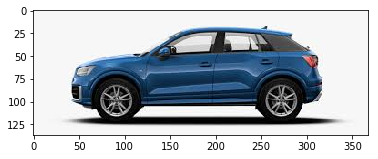

In [2]:
# Utility function to display images
def show_image(img, fig_size = None):
    print(img.shape)
    img = img.astype('uint8')
    
    if fig_size is not None:
        plt.figure(figsize=fig_size)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
image1 = cv2.imread('dataset/car.png')
show_image(image1)

### Correlation Filtering

When we talk about image filtering, these are mostly of two types. Correlation Filters and Convolutional Filters. The basic idea in correlation filters is that the filter or the kernel is slided over the entire image. Each weight of the of the kernel is multiplied with the pixel values of the image. And finally we take a sum of these products and that will be the pixel values for the output image. Let's see some examples.

#### Average Filtering

Let's define a 2D filter of shape 5x5 and the filter values will be uniformly distributed since it is an average filter, which essentially means, value at each position will be same. In-order to create a normalized box filter, we will take value at each position to be 1/25.

In [3]:
kernel = np.ones((5,5))/25.
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

(137, 736, 3)


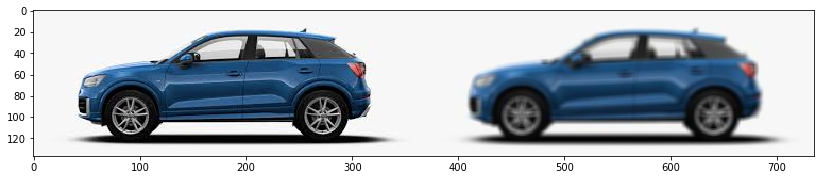

In [6]:
filtered_img = cv2.filter2D(image1,-1,kernel)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image1, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

And we see very smooth or blurred out picture, which is what essentially an average filter does. But the dimensions of the original image is still preserved.

#### Gaussian Filtering

Gaussian filtering is done using a Gaussian function rather than a box function. The kernel dimensions should be positive and odd. And it is often called as a Gaussian Blur filter.

(137, 736, 3)


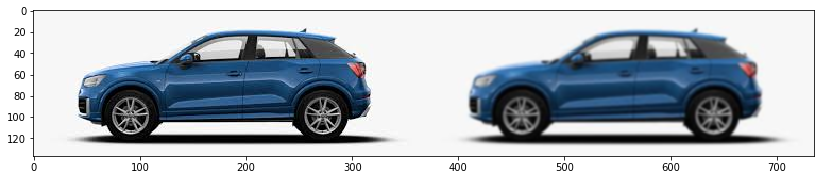

In [7]:
filtered_img = cv2.GaussianBlur(image1,(5,5),0)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image1, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

#### Median Filtering

Median filters computes the median of all the pixels under the window region of the filter and the central pixel is replaced with this median value. We will see the use of these filters when we deal with removing salt and pepper noise.

(137, 736, 3)


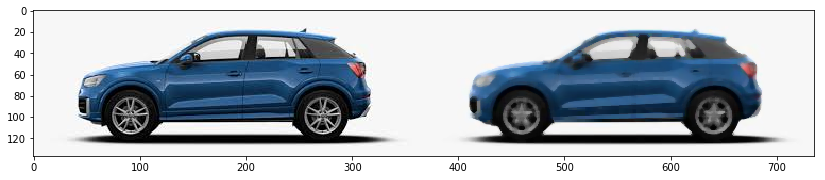

In [8]:
filtered_img = cv2.medianBlur(image1, 5)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image1, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

#### Bilateral Filters

Most of the filters above (depending upon the dimensions selected) tends to blur the edges. In such a case, bilateral filters are extremely effective as it tends to preserve the edges and remove the noise. Even this filter uses a Gaussian filter in space domain, but along with that, it also uses another multiplicative Gaussian filter, which is a function of pixel intensity differences.

(137, 736, 3)


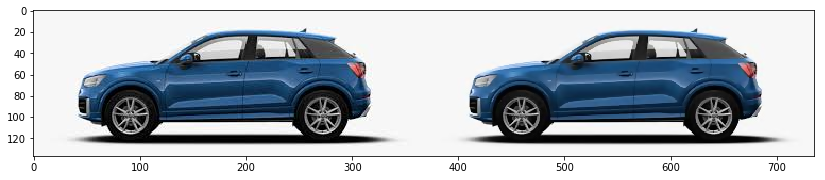

In [11]:
filtered_img = cv2.bilateralFilter(image1,5,50,50)

# concatenate both the images horizontally
clubbed_image = np.concatenate((image1, filtered_img), axis=1)
show_image(clubbed_image, (14,7))

And we can see that the edges are preserved.